In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### 신용카드 사기 검출
- 해당 df의 'Class'가 target. 0이 정상 1이 사기인데, 1이 굉장히 적은 불균형 데이터.
- SMOTE를 구현한 파이썬 패키지 설치(imbalanced-laern) : "conda install -c conda-forge imbalanced-learn" (아나콘다 프롬프트 관리자 권한 실행)

In [2]:
df = pd.read_csv('04/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info() #결측값은 없고 모두 숫자형 칼럼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts() #엄청난 불균형 데이터

0    284315
1       492
Name: Class, dtype: int64

- 데이터 전처리

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#df가 들어오면 df 복사, time 칼럼 삭제
def get_preprocessed(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [8]:
#get_preprocessed 함수 실행하고, train/test split 
def get_train_test_data(df=None):
    df_copy = get_preprocessed(df)
    
    y_df = df_copy.iloc[:,-1]
    X_df = df_copy.iloc[:,:-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=0, stratify=y_df)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = get_train_test_data(df)

In [10]:
#만들어진 값들에서 레이블 값 비율 알아보자 ->서로 비슷하게 분할됨!
print('train셋의 분포 : \n', y_train.value_counts()/y_train.shape[0] *100)
print('---------------------')
print('test셋의 분포 : \n', y_test.value_counts()/y_test.shape[0] *100)

train셋의 분포 : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
---------------------
test셋의 분포 : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


###### 분류모델 #1 : 로지스틱

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score

In [12]:
def get_clf_eval(test, pred):
    acc = accuracy_score(test, pred)
    prec = precision_score(test, pred)
    recall = recall_score(test, pred)
    f1 = f1_score(test, pred)
    auc = roc_auc_score(test, pred)
    print(confusion_matrix(test, pred))
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1스코어: {3:.4f}, AUC 값: {4:.4f}'.format(acc, prec, recall, f1, auc))

In [13]:
#객체
lr_clf = LogisticRegression()
#학습
lr_clf.fit(X_train, y_train)
#예측
preds = lr_clf.predict(X_test)
#평가
get_clf_eval(y_test, preds)

[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081, F1스코어: 0.7171, AUC 값: 0.8040


###### 분류모델 #2 : LIGHTGBM

In [14]:
#학습, 예측, 평가 한번에 하는 함수
def get_model_train_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    get_clf_eval(y_test, pred)

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =100 , num_leaves = 64, n_jobs = -1, boost_from_average=False) #불균형한 데이터에선, 반드시 false 설정!!

get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

[[85290     5]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9565, 재현율: 0.7432, F1스코어: 0.8365, AUC 값: 0.8716


###### 데이터 분포도 확인, 변환하기

In [16]:
import seaborn as sns

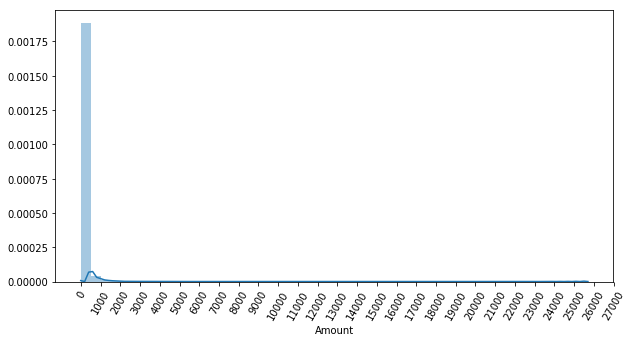

In [17]:
#'Amount'의 분포도 살펴보기
plt.figure(figsize=(10,5))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(df['Amount'])

- 표준화(StandardScaler)

In [18]:
#분포가 매우 0에 가까이 있음. 로지스틱은 선형 모델이므로 정규분포를 따르도록 전처리해주는 게 중요. ->표준화!!
from sklearn.preprocessing import StandardScaler
#아까 만든 get_preprocessed 함수 수정
def get_preprocessed(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) #시리즈이므로 array형태->2차원 수정
    df_copy.insert(0, 'Amount_Scaled', amount_n) #df_copy에 위의 amount_n을 0번 칼럼으로 집어넣음
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) #기존 피처 삭제
    return df_copy

In [19]:
#get_preprocessed 함수 실행하고, train/test split 
def get_train_test_data(df=None):
    df_copy = get_preprocessed(df)
    
    y_df = df_copy.iloc[:,-1]
    X_df = df_copy.iloc[:,:-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=0, stratify=y_df)
    
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = get_train_test_data(df)

In [21]:
#amount를 정규분포 형태로 변환후 아까의 로지스틱과 lightGBM 다시 수행. ->결과: 전과 비슷..ㅜㅜ
print('##로지스틱##')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('##lightGBM##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

##로지스틱##
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1스코어: 0.7143, AUC 값: 0.8040
##lightGBM##
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1스코어: 0.8421, AUC 값: 0.8783


- 로그 변환 : 데이터 분포가 심하게 왜곡돼 있을 경우 적용하는 중요 기법 중 하나.

In [22]:
#아까 만든 get_preprocessed 함수 로그변환으로 수정
def get_preprocessed(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount']) #넘파이의 np.log1p 사용하면 로그변환 가능
    df_copy.insert(0, 'Amount_Scaled', amount_n) #df_copy에 위의 amount_n을 0번 칼럼으로 집어넣음
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) #기존 피처 삭제
    return df_copy

In [23]:
#get_preprocessed 함수 실행하고, train/test split 
def get_train_test_data(df=None):
    df_copy = get_preprocessed(df)
    
    y_df = df_copy.iloc[:,-1]
    X_df = df_copy.iloc[:,:-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=0, stratify=y_df)
    
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = get_train_test_data(df)

In [25]:
#amount를 로그변환 후 아까의 로지스틱과 lightGBM 다시 수행. ->결과: 미미하게 전과 비슷..ㅜㅜ
print('##로지스틱##')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('##lightGBM##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

##로지스틱##
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081, F1스코어: 0.7200, AUC 값: 0.8040
##lightGBM##
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1스코어: 0.8496, AUC 값: 0.8817


###### 이상치 데이터 제거

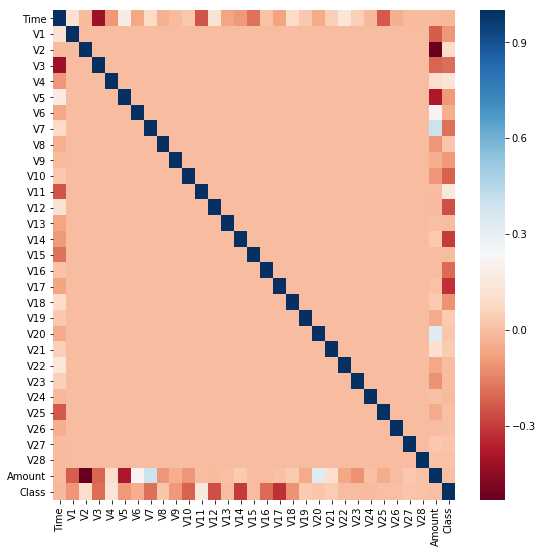

In [26]:
#상관도
plt.figure(figsize=(9,9))
corr = df.corr() #아까 전처리된 df 말고 원본 df를 사용했음!
sns.heatmap(corr, cmap='RdBu') #양의 상관관계:진한 파랑/ 음의 상관관계: 진한 빨강.

- 여기서 'Class' 피처와 음의 상관성이 높은 피처는 'V14','V17'. 여기서 V14 피처의 이상치를 제거해보자.

In [38]:
#이 함수는 df, 추출칼럼, 가중치(1.5)를 넣으면 아웃라이어의 인덱스를 반환

def get_outlier(df=None, column=None, weight=1.5): #나중에 column에는 'V14', 가중치는 1.5*IQR 이므로 1.5로 설정.
    #사기에 해당하는 칼럼 추출
    fraud = df[df['Class']==1][column] #fraud는 시리즈이므로, fraud.values로 array로 변환.
    q1 = np.percentile(fraud.values, 25)
    q3 = np.percentile(fraud.values, 75)
    #IQR을 구하고, 최댓값과 최솟값 구하기
    iqr = q3-q1
    iqr_weight = iqr*weight
    lowest = q1 - iqr_weight #숫자값
    highest = q3 + iqr_weight #숫자값
    #이상치인 것 설정(lowest보다 작은 것 or highest보다 큰것)
    outlier_ind = fraud[(fraud<lowest)|(fraud>highest)].index #fraud는 시리즈이므로 불린인덱싱 사용 --뒤에 .index 붙이면 인덱스만 추출.
    return outlier_ind

In [35]:
f = df[df['Class']==1]['V14'] #시리즈
f[(f<-5)|(f>10)].index

Int64Index([  6108,   6329,   6331,   6334,   6336,   6338,   6427,   6446,
              6472,   6529,
            ...
            261056, 261473, 261925, 262560, 262826, 263274, 263877, 279863,
            280143, 281144],
           dtype='int64', length=324)

In [29]:
type(df[df['Class']==1]['V14'])

pandas.core.series.Series

In [30]:
type(df[df['Class']==1]['V14'].values)

numpy.ndarray

In [31]:
np.percentile(df[df['Class']==1]['V14'].values, 25)

-9.692722964972385

- 결과

In [39]:
outlier_index = get_outlier(df, 'V14', weight=1.5)
print(outlier_index) #V14 컬럼에는 아웃라이어가 4개 존재.

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [41]:
#아까 만든 get_preprocessed 함수 로그변환으로 수정 + 위의 get_outlier 도 적용하고 아웃라이어 삭제까지!
def get_preprocessed(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount']) #넘파이의 np.log1p 사용하면 로그변환 가능
    df_copy.insert(0, 'Amount_Scaled', amount_n) #df_copy에 위의 amount_n을 0번 칼럼으로 집어넣음
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) #기존 피처 삭제
    
    #이상치 삭제 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5) 
    df_copy.drop(outlier_index, axis=0, inplace = True) #데이터 4개 삭제
    return df_copy

In [42]:
#get_preprocessed 함수 실행하고, train/test split 
def get_train_test_data(df=None):
    df_copy = get_preprocessed(df)
    
    y_df = df_copy.iloc[:,-1]
    X_df = df_copy.iloc[:,:-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=0, stratify=y_df)
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = get_train_test_data(df)

In [44]:
#아까의 로지스틱과 lightGBM 다시 수행. ->결과: 꽤 상승!
print('##로지스틱##')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('##lightGBM##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

##로지스틱##
[[85282    13]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8829, 재현율: 0.6712, F1스코어: 0.7626, AUC 값: 0.8355
##lightGBM##
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288, F1스코어: 0.8930, AUC 값: 0.9144


###### SMOTE 오버 샘플링 적용!
- 앞에서 만든 로그변환, 이상치제거 후에 train셋에 적용한 것이므로, 로그변환 및 이상치제거가 전부다 적용된 상태임.
- 거기서 train셋만 'train_over'라는 이름으로 바꾼 것 뿐!

In [45]:
from imblearn.over_sampling import SMOTE

In [69]:
#객체 만들고, 학습 데이터에만 오버 샘플링 적용!
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

print('적용 전 트레인셋: ', X_train.shape, y_train.shape)
print('적용 후 트레인셋: ', X_train_over.shape, y_train_over.shape) #적용후 트레인셋이 아주 많이 증식됨!

적용 전 트레인셋:  (199362, 29) (199362,)
적용 후 트레인셋:  (398040, 29) (398040,)


In [47]:
type(y_train_over) #시리즈 변환 후 value counts

numpy.ndarray

In [49]:
print(pd.Series(y_train_over).value_counts()) #원래 1이 굉장히 적은 데이터였는데 0과 같아짐.

1    199020
0    199020
dtype: int64


In [52]:
#아까의 로지스틱과 lightGBM 다시 수행. ->결과: 많이 상승!(로지스틱은 별루....)
print('##로지스틱##')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)
print('##lightGBM##')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

##로지스틱##
[[82932  2363]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0540, 재현율: 0.9247, F1스코어: 0.1021, AUC 값: 0.9485
##lightGBM##
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493, F1스코어: 0.8889, AUC 값: 0.9246


In [57]:
def pre_recall_curve_plot(y_test, pred_proba):
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(12,8))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision') #x: 임곗값 , y:precision
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall') #x:임곗값, y:recall
    
    #x축 단위 0.1로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #label, legend, grid
    plt.xlabel('Threshold value')
    plt.ylabel('Precision & Recall value')
    plt.grid(True)
    plt.legend()
    plt.show()

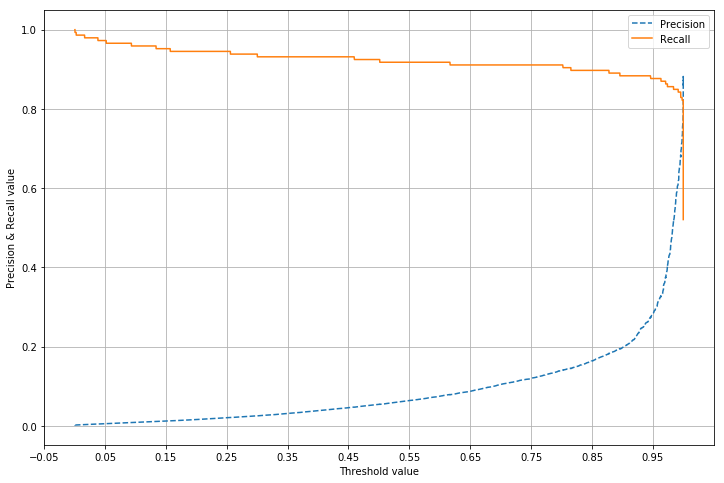

In [58]:
pre_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1]) #로지스틱 모델의 경우 임곗값에 따른 정밀도, 재현율 민감도가 너무 심함.. 사용 불가!

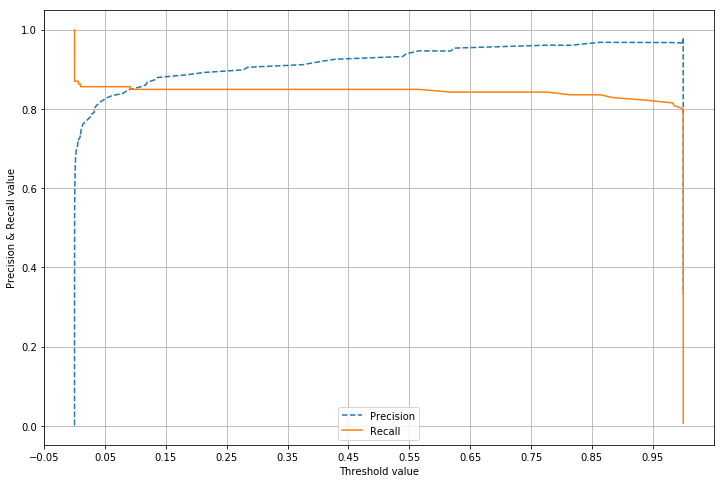

In [68]:
pre_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:,1])